<a href="https://colab.research.google.com/github/DevinDaughtry/BME3053C-Final-Project/blob/main/HRV_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HRV Analysis from PPG Signals

This notebook demonstrates a biomedical signal processing pipeline for analyzing **photoplethysmography (PPG)** data and extracting **heart rate variability (HRV)** metrics.

- We simulate or upload a PPG waveform
- Detect heartbeat peaks
- Calculate RR intervals
- Extract HRV metrics (mean RR, SDNN, RMSSD)
- Estimate stress level (experimental)

No installation required, this notebook runs fully in **Google Colab**.

In [31]:
!pip install -q numpy pandas matplotlib scipy

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from google.colab import files

In [33]:
def generate_sample_ppg(duration=10, fs=100, heart_rate=75):
    t = np.linspace(0, duration, duration * fs)
    rr_interval = 60 / heart_rate
    noise = np.random.normal(0, 0.02, size=t.shape)
    ppg = 0.6 * np.sin(2 * np.pi * t / rr_interval) + noise
    ppg += 0.4 * np.sin(4 * np.pi * t / rr_interval)
    ppg = (ppg - np.min(ppg)) / (np.max(ppg) - np.min(ppg))
    return pd.DataFrame({'Time': t, 'PPG': ppg})

# Choose method
use_sample = True  # Change to False to upload CSV

if use_sample:
    df = generate_sample_ppg()
else:
    uploaded = files.upload()
    filename = next(iter(uploaded))
    df = pd.read_csv(filename)

df.head()

,Time,PPG
0,0.00000,0.504293
1,0.01001,0.559979
2,0.02002,0.602463
3,0.03003,0.674132
4,0.04004,0.724937


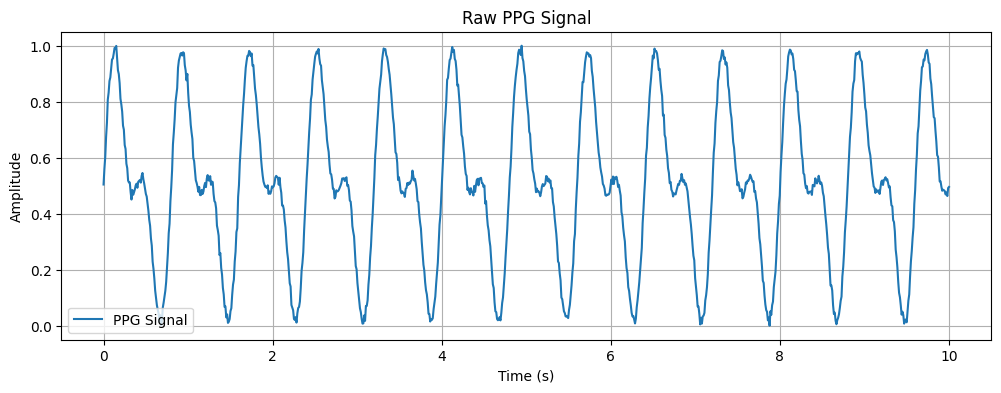

In [34]:
plt.figure(figsize=(12, 4))
plt.plot(df['Time'], df['PPG'], label='PPG Signal')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Raw PPG Signal")
plt.legend()
plt.grid(True)
plt.show()

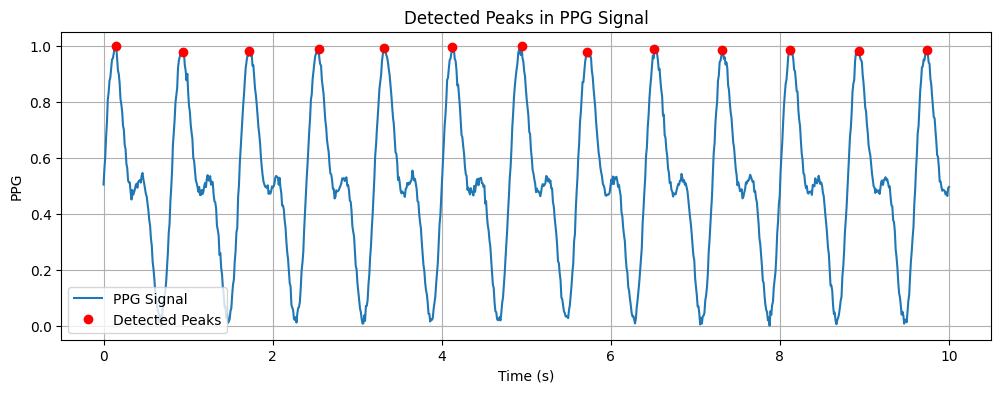

In [35]:
def detect_peaks(ppg, distance=30, prominence=0.4):
    peaks, _ = find_peaks(ppg, distance=distance, prominence=prominence)
    return peaks

peaks = detect_peaks(df["PPG"].values)

# Plot with peaks
plt.figure(figsize=(12, 4))
plt.plot(df['Time'], df['PPG'], label='PPG Signal')
plt.plot(df['Time'].iloc[peaks], df['PPG'].iloc[peaks], 'ro', label='Detected Peaks')
plt.xlabel("Time (s)")
plt.ylabel("PPG")
plt.title("Detected Peaks in PPG Signal")
plt.legend()
plt.grid(True)
plt.show()

In [36]:
def compute_hrv(rr_ms):
    rr = np.array(rr_ms)
    mean_rr = np.mean(rr)
    sdnn = np.std(rr, ddof=1)
    rmssd = np.sqrt(np.mean(np.square(np.diff(rr))))
    return mean_rr, sdnn, rmssd

# Compute RR intervals (ms)
rr_intervals = np.diff(df["Time"].values[peaks]) * 1000
mean_rr, sdnn, rmssd = compute_hrv(rr_intervals)

print(f"Mean RR: {mean_rr:.2f} ms")
print(f"SDNN:    {sdnn:.2f} ms")
print(f"RMSSD:   {rmssd:.2f} ms")

Mean RR: 799.13 ms
SDNN:    18.02 ms
RMSSD:   30.33 ms


In [37]:
def estimate_stress(rmssd):
    if rmssd < 30:
        return "High"
    elif rmssd < 60:
        return "Moderate"
    else:
        return "Low"

stress = estimate_stress(rmssd)
print(f"Estimated Stress Level: {stress}")

Estimated Stress Level: Moderate


In [38]:
summary = pd.DataFrame({
    "Metric": ["Mean RR (ms)", "SDNN (ms)", "RMSSD (ms)", "Stress Level"],
    "Value": [f"{mean_rr:.2f}", f"{sdnn:.2f}", f"{rmssd:.2f}", stress]
})
summary

,Metric,Value
0,Mean RR (ms),799.13
1,SDNN (ms),18.02
2,RMSSD (ms),30.33
3,Stress Level,Moderate


## Summary

This notebook successfully:
- Loaded or generated PPG signal
- Detected heartbeat peaks
- Calculated RR intervals and HRV metrics
- Estimated stress level from RMSSD

> You may modify the `detect_peaks()` parameters for tuning accuracy on real data.

---

Biomedical Relevance:
HRV is a non-invasive biomarker of **autonomic nervous system** activity and can help assess **stress**, **fatigue**, or **cardiovascular health**.

---